Projekt z uczenia maszyn

In [258]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    f1_score,
    classification_report,
)
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import SGDClassifier

Import/tworzenie danych użytych do badań

In [259]:
# dataset = pd.read_csv("dataset.csv")

X, y = datasets.make_classification(
    n_features=2,  # liczba atrybutów zbioru
    n_samples=40,  # liczba generowanych wzorców
    n_informative=2,  # liczba atrybutów informatywnych, tych które zawierają informacje przydatne dla klasyfikacji
    n_repeated=0,  # liczba atrybutów powtórzonych, czyli zduplikowanych kolumn
    n_redundant=0,  # liczba atrybutów nadmiarowych
    flip_y=0.08,  # poziom szumu
    random_state=100,  # ziarno losowości, pozwala na wygenerowanie dokładnie tego samego zbioru w każdym powtórzeniu
    n_classes=2,  # liczba klas problemu
    weights=[0.89, 0.11],
)


# X = dataset.iloc[:, [0, 1]].values
# y = dataset.iloc[:, [2]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Klasyfikacja

In [260]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

clf = SGDClassifier(loss='hinge')
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
f1_clf = f1_score(y_test, y_pred_clf)

class_weights = {0: 1, 1: 20}
class_weights_max = {0: 0.5, 1: 100}

wclf = SGDClassifier(loss='hinge', class_weight=class_weights)
wclf.fit(X_train, y_train)

y_pred_wclf = wclf.predict(X_test)
f1_wclf = f1_score(y_test, y_pred_wclf)

wclf_max = SGDClassifier(loss='squared_hinge', class_weight=class_weights)
wclf_max.fit(X_train, y_train)

y_pred_wclf_max = wclf_max.predict(X_test)
f1_wclf_max = f1_score(y_test, y_pred_wclf_max)

Prezentacja wyników

Metryka F1:
Brak wag: 0.5
Waga mała: 0.667
Waga duża: 0.667


C:\Users\micha\AppData\Local\Temp\ipykernel_27024\2061811569.py:47: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  [disp.surface_.collections[0], disp_mod.surface_.collections[0], disp_mod_max.surface_.collections[0]],


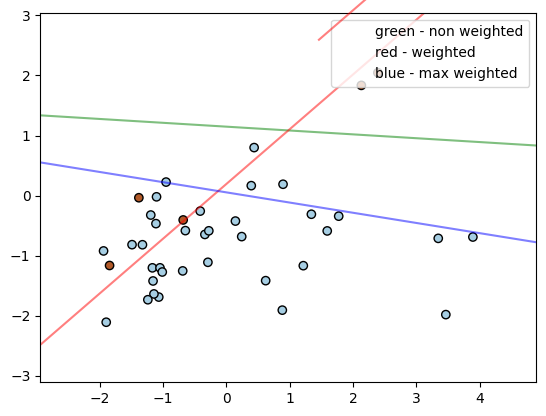

Brak wag
Precision: 0.844
Recall: 0.800
F1-score: 0.763
-------------
Funkcja hinge
Precision: 0.957
Recall: 0.955
F1-score: 0.950
-------------
Funkcja squared hinge
Precision: 0.986
Recall: 0.669
F1-score: 0.791


In [261]:
print("Metryka F1:")
print("Brak wag:", round(f1_clf, 3))
print("Waga mała:", round(f1_wclf, 3))
print("Waga duża:", round(f1_wclf_max, 3))




plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="green",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

disp_mod = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X,
    plot_method="contour",
    colors="red",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

disp_mod_max = DecisionBoundaryDisplay.from_estimator(
    wclf_max,
    X,
    plot_method="contour",
    colors="blue",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

plt.legend(
    [disp.surface_.collections[0], disp_mod.surface_.collections[0], disp_mod_max.surface_.collections[0]],
    ["green - non weighted", "red - weighted", "blue - max weighted"],
    loc="upper right",
)

plt.show()

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_clf, average='weighted', pos_label=1)

print("Brak wag")
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1:.3f}')
print('-------------')
print("Funkcja hinge")

wprecision, wrecall, wf1, _ = precision_recall_fscore_support(y_test, y_pred_wclf, average='weighted', pos_label=1, sample_weight=[1 if label == 0 else 20 for label in y_test])

print(f'Precision: {wprecision:.3f}')
print(f'Recall: {wrecall:.3f}')
print(f'F1-score: {wf1:.3f}')
print('-------------')
print("Funkcja squared hinge")

wmax_precision, wmax_recall, wmax_f1, _ = precision_recall_fscore_support(y_test, y_pred_wclf_max, average='weighted', pos_label=1, sample_weight=[0.5 if label == 0 else 100 for label in y_test])

print(f'Precision: {wmax_precision:.3f}')
print(f'Recall: {wmax_recall:.3f}')
print(f'F1-score: {wmax_f1:.3f}')




Text(0.5, 1.0, 'Predicted Labels WCLF')

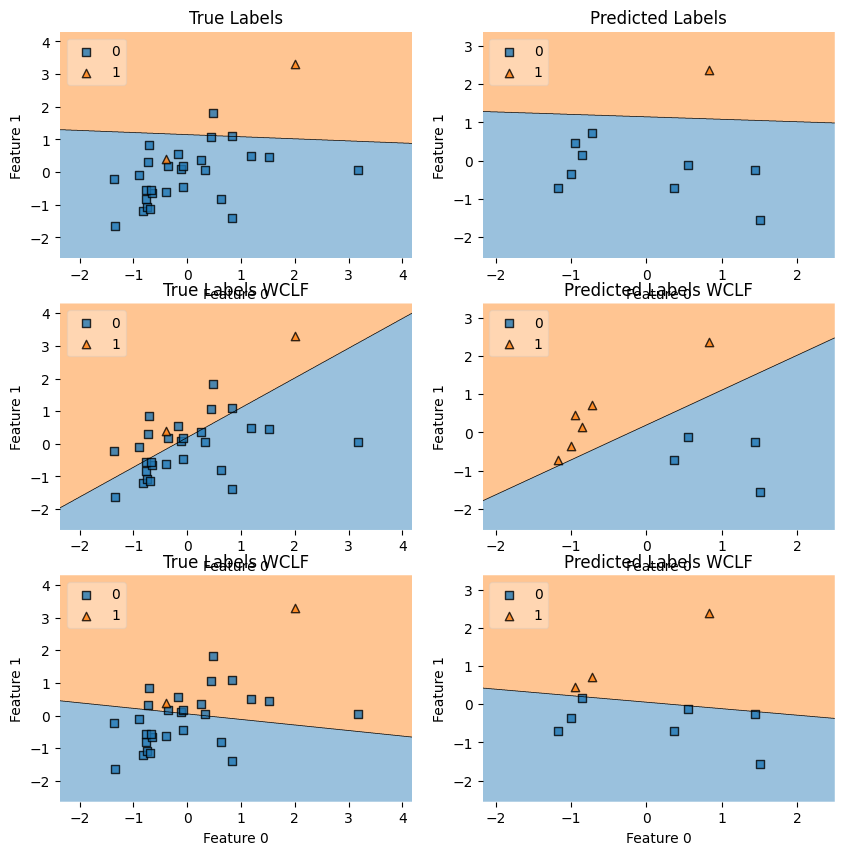

In [262]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15))

plot_decision_regions(X_train, y_train.ravel(), clf=clf, ax=ax[0,0], legend=2)
ax[0,0].set_xlabel("Feature 0")
ax[0,0].set_ylabel("Feature 1")
ax[0,0].set_title("True Labels")
# ax[0,0].set_xlim(-4, 4)
# ax[0,0].set_ylim(-4, 4)

plot_decision_regions(X_test, y_pred_clf, clf=clf, ax=ax[0,1], legend=2)
ax[0,1].set_xlabel("Feature 0")
ax[0,1].set_ylabel("Feature 1")
ax[0,1].set_title(f"Predicted Labels")
# ax[0,1].set_xlim(-4, 4)
# ax[0,1].set_ylim(-4, 4)

plot_decision_regions(X_train, y_train.ravel(), clf=wclf, ax=ax[1,0], legend=2)
ax[1,0].set_xlabel("Feature 0")
ax[1,0].set_ylabel("Feature 1")
ax[1,0].set_title("True Labels WCLF")

plot_decision_regions(X_test, y_pred_wclf, clf=wclf, ax=ax[1,1], legend=2)
ax[1,1].set_xlabel("Feature 0")
ax[1,1].set_ylabel("Feature 1")
ax[1,1].set_title(f"Predicted Labels WCLF")


plot_decision_regions(X_train, y_train.ravel(), clf=wclf_max, ax=ax[2,0], legend=2)
ax[2,0].set_xlabel("Feature 0")
ax[2,0].set_ylabel("Feature 1")
ax[2,0].set_title("True Labels WCLF")

plot_decision_regions(X_test, y_pred_wclf_max, clf=wclf_max, ax=ax[2,1], legend=2)
ax[2,1].set_xlabel("Feature 0")
ax[2,1].set_ylabel("Feature 1")
ax[2,1].set_title(f"Predicted Labels WCLF")
